In [20]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

In [25]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

In [26]:
opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=20,
                   validation_data=(x_test, y_test_categorical))

Epoch 1/20
1563/1563 [==============================] - 75s 47ms/step - loss: 1.9143 - accuracy: 0.2860 - val_loss: 1.3981 - val_accuracy: 0.4943
Epoch 2/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3338 - accuracy: 0.5208 - val_loss: 1.1781 - val_accuracy: 0.5780
Epoch 3/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1512 - accuracy: 0.5929 - val_loss: 1.1026 - val_accuracy: 0.6169
Epoch 4/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0364 - accuracy: 0.6355 - val_loss: 1.0783 - val_accuracy: 0.6270
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9550 - accuracy: 0.6636 - val_loss: 1.1099 - val_accuracy: 0.6159
Epoch 6/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9116 - accuracy: 0.6833 - val_loss: 1.1056 - val_accuracy: 0.6329
Epoch 7/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8561 - accuracy: 0.7057 - val_loss: 1.0340 -

313/313 - 4s - loss: 1.1612 - accuracy: 0.6584
1563/1563 - 19s - loss: 0.5776 - accuracy: 0.7966


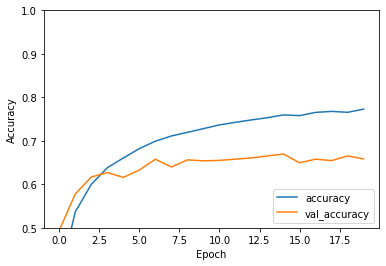

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train_categorical, verbose=2)

In [30]:
print("test_loss=",test_loss)
print("test_acccurcy=",test_acc)
print("train_acccurcy=",train_acc)
print("train_loss=",train_loss)

test_loss= 1.1612060070037842
test_acccurcy= 0.6583999991416931
train_acccurcy= 0.7965999841690063
train_loss= 0.577631413936615
